> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Appointment Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project we will be analysing the data set of Appointments and what factors will affect patients showing up for their appointment. We will also be looking to see how many female patients missed their appointment vs. Male attendance. In addition we will be analysing patient age groups to determine if age is a factor of No-show appointments.
>
>

In [786]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> First we will read in the dataset and then check the first few rows for any formatting issues or irrelevant data.

### General Properties

In [787]:
#read in the data from the csv file noshowappointments.csv
ns_data = pd.read_csv('noshowappointments.csv')
ns_data.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

In the next line we will check and determine which data types need to be changed.

In [788]:
#This allows us to see the columns and their datatypes in the dataset
ns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [789]:
ns_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We also need to verify that the dataset does not contain any duplicate entries

In [790]:
# check data set for duplicates
sum(ns_data.duplicated())

0

We need to make sure the data does not contain any null values.

In [791]:
#checking for null data
pd.isna(ns_data).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

we will be dropping the columns for Scholarship as it is irrelevant to the patient information. We will also be dropping The neighborhood, appointment day, health conditions, sms_received. We simply want to know if the Sexual orientation and age group has a relationship towards attendance.


In [792]:
# removing unwanted columns and assigning the new data to variable named clean
clean = ns_data.drop(['PatientId','AppointmentID','ScheduledDay','Scholarship','Neighbourhood', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'], axis=1)
clean

,Gender,AppointmentDay,Age,No-show
0,F,2016-04-29T00:00:00Z,62,No
1,M,2016-04-29T00:00:00Z,56,No
2,F,2016-04-29T00:00:00Z,62,No
3,F,2016-04-29T00:00:00Z,8,No
4,F,2016-04-29T00:00:00Z,56,No
...,...,...,...,...
110522,F,2016-06-07T00:00:00Z,56,No
110523,F,2016-06-07T00:00:00Z,51,No
110524,F,2016-06-07T00:00:00Z,21,No
110525,F,2016-06-07T00:00:00Z,38,No


In [793]:
# replacing yes or no values with 0 and 1. 1 meaning patient showed up and 0 meaning patient was a no show.
clean['No-show'] = clean['No-show'].replace(['Yes', 'No'], [0, 1])

In [794]:
# we should fix the minimum age in the dataset from -1
clean['Age'] = clean['Age'].abs()

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (How many female patients vs male patients were a no show)

In [795]:
# create a group to show the amount of male and female patients showed or no showed.
grouped_patients_gender = clean.groupby(['Gender', 'No-show']).size()
print (grouped_patients_gender)



Gender  No-show
F       0          14594
        1          57246
M       0           7725
        1          30962
dtype: int64


in the female group

We will create a graph to show the amount of patients male or female that were no shows.

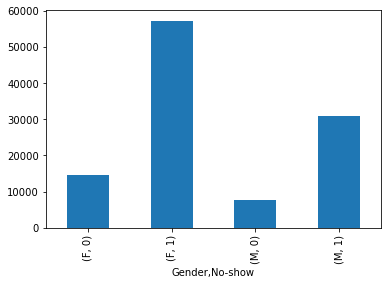

In [796]:
grouped_patients_gender.plot(kind='bar');

Judging by the bar graph above we can see that the was a total of over 50,000 female patients who showed up to their appointment and over 30,000 male patients who showed up for their appointments.

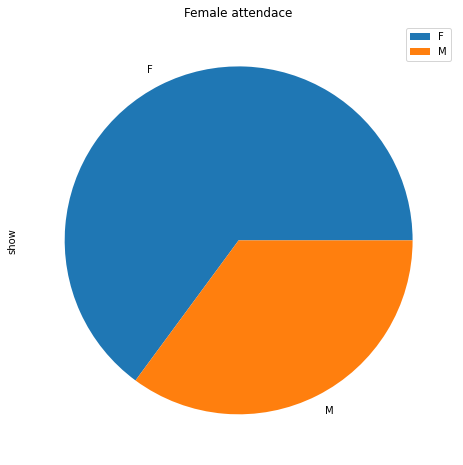

In [797]:
# creating seperate groups for male and females to plot seperate charts.
gp_f= clean.query('Gender == "F"')

gp_m= clean.query('Gender == "M"')

#create a function that creates a bar graph to show the attendance totals for male or female
def pie_plots(clean,col_name,showed, noshow):
    plt.figure(figsize=[8,8])
    clean[col_name][showed_up].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title('Female attendace')
pie_plots(clean,'Gender',showed_up,no_show)

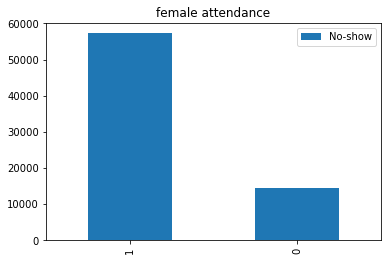

In [812]:
def bar_plots(clean,gender,showed, noshow):
    if gender == 'gp_f':
        return gp_f['No-show'].value_counts().plot(kind='bar');
    else:
        return gp_m['No-show'].value_counts().plot(kind='bar');
    plt.legend();
# created a bar chart to show the number of females    
bar_plots(clean,'gp_f',no_show,showed_up)
plt.title('female attendance')
plt.legend()

Text(0.5, 1.0, 'male attendance')

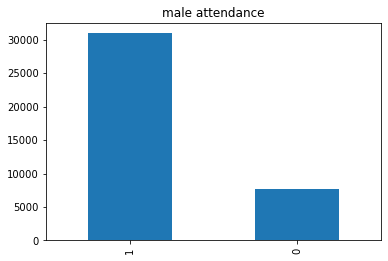

In [799]:
bar_plots(clean,'gp_m',no_show,showed_up)
plt.title('male attendance')

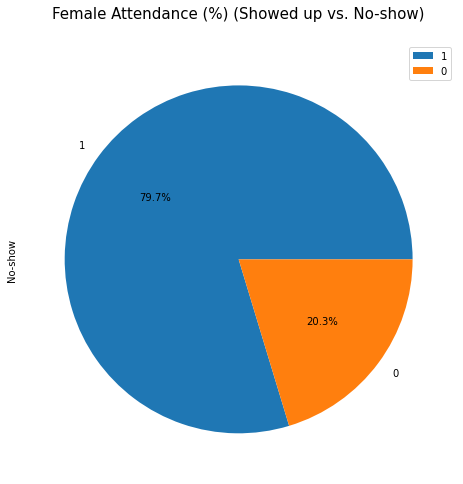

In [802]:
#Using a pie chart to analyze and figure what percantage of female patients were a no show
gp_f_chart = gp_f['No-show'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize= (8,8))
gp_f_chart.set_title("Female Attendance" + ' (%) (Showed up vs. No-show)\n', fontsize = 15);
plt.legend();

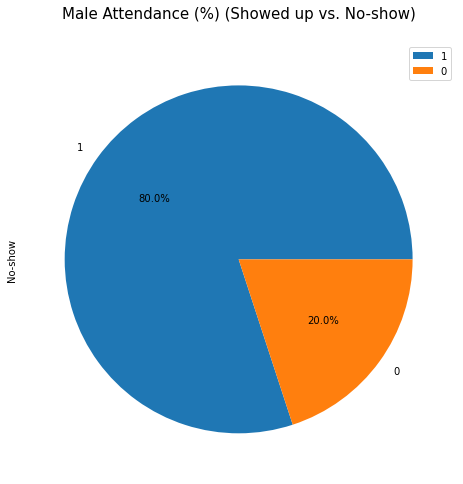

In [803]:
#Using a pie chart to analyze and figure what percantage of male patients were a no show

gp_m_chart = gp_m['No-show'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize= (8,8))
gp_m_chart.set_title("Male Attendance" + ' (%) (Showed up vs. No-show)\n', fontsize = 15);
plt.legend();

You can see from both of our pie charts that even though there were more female patients than males the attendance was not affected as both roughly attended the same in the same percentile.

### Research Question 2  (Does age determine wether patients show up)

In [804]:
#setting no-show yes or no to numerical values to further evaluate and make it easier to plot
showed_up = clean['No-show'] == 1
no_show = clean['No-show'] == 0
clean['showed_up'] = showed_up
clean['no_show'] = no_show

,mean,std
No-show,,
0,34.317667,21.965941
1,37.790087,23.338842


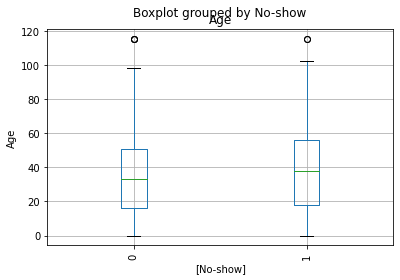

In [805]:
clean.boxplot(column=['Age'], by= ['No-show'], rot=90)
plt.ylabel("Age")
pd.DataFrame(clean.groupby(['No-show'])['Age'].describe().loc[:,['mean','std']])

The above Boxplot chart gives us the information of how our information is spread out our No-show (0) side has people ranging their 20s to 50s not showing up and the mean being around 35 years of age. Also our showed up (1) side more people in their 20s to 60s with the mean being around 38 years of age.

In [806]:
# get an understanding of the numbers of patients and their age.
clean.describe()

,Age,No-show
count,110527.000000,110527.000000
mean,37.088892,0.798067
std,23.110176,0.401444
min,0.000000,0.000000
25%,18.000000,1.000000
50%,37.000000,1.000000
75%,55.000000,1.000000
max,115.000000,1.000000


In the above cell we can see that the mean age of patiens is 37.

Text(0, 0.5, 'Number of Patients')

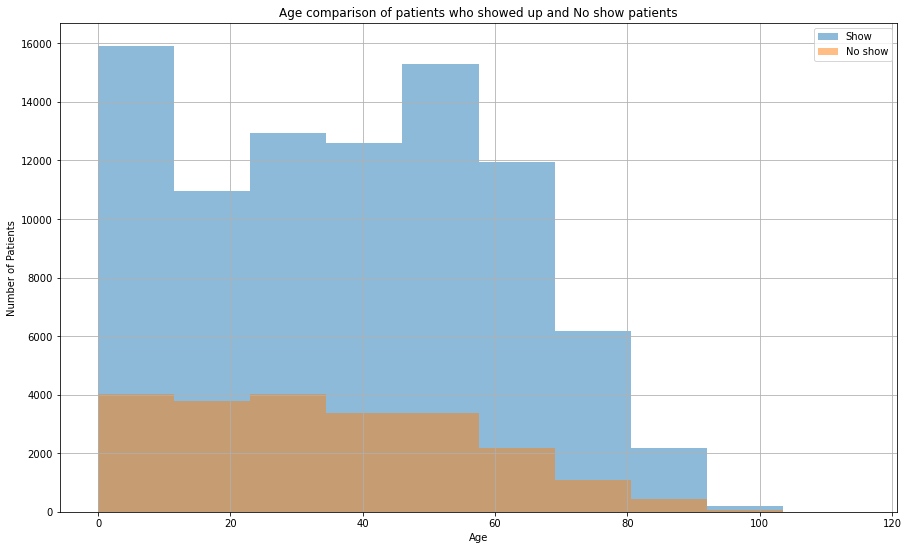

In [807]:
plt.figure(figsize=[15,9])
clean.Age[showed_up].hist(alpha = 0.5, label = 'Show')
clean.Age[no_show].hist(alpha=0.5, label= 'No show')
plt.legend()
plt.title('Age comparison of patients who showed up and No show patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')

From the data above we can automatically rule out the Age group of 90 and above as their was very little patients in that age group.
Patients in the younger group tend to show up more specifically in the 0-10 range

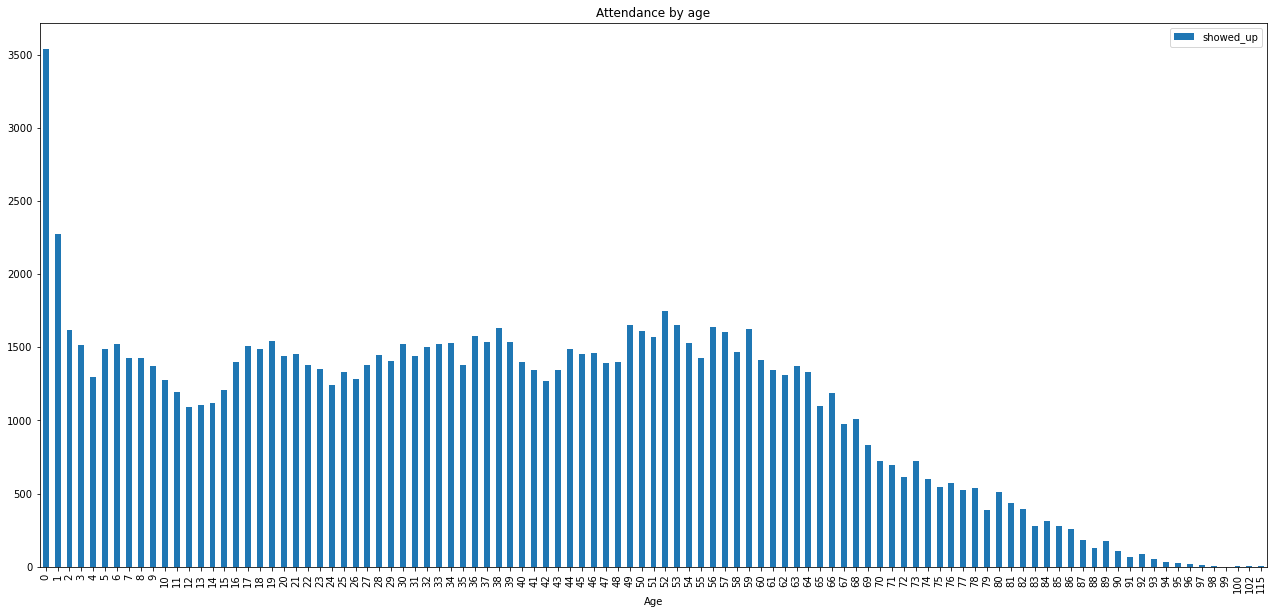

In [808]:
#plot the number of people who showed up for their appointment by age using a function
def age_bar_plots(clean,col_name,showed, noshow):
    clean.groupby(col_name)['showed_up'].count().plot(kind='bar',figsize=(22,10));
    plt.legend();
    plt.title('Attendance by age')
age_bar_plots(clean,'Age',showed_up,no_show)



<a id='conclusions'></a>
## Conclusions

From our analysis we can see that Gender had no affect on patient attendance. Upon further examination it is clear that age was a big factor in attendance of patients. patients between the age of 0-10 had the best attendance record. You can see as group of  patient gets older the more attendance starts to drop. In the dataset we were given he neighborhood of each patient but no indication of how far the neighborhood was from the clinic. If we were provided the mileage or distance than we could factor in the percentage of patients that no showed by the neighborhood and how far it was.

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!